<a href="https://colab.research.google.com/github/pranabsarma18/Machine-Learning-Technique/blob/main/Python%20Implementation/Week_1_Programming_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week-1

**Note to Learners**: 

- Click on "Copy to Drive", the button that appears just below the taskbar, to make a copy of this notebook in your drive. If you continue working with this notebook, changes **will not** be saved.


- For questions that involve plotting, just enter $0$ as the answer in the portal.
- For numerical questions, there are two parts. The first part expects you to compute some quantity, say a parameter of a machine learning model. The second part will require you to convert this quantity (if it is not a scalar) into a scalar so that it can be entered as the answer on the portal to the corresponding NAT question.



## Dataset

We will be working with a subset of the [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database). Run the cell given below to generate the data-matrix $\mathbf{X}$, which is of shape $(n, d)$, where $n$ denotes the number of samples and $d$ denotes the number of features. You will be using this dataset for the rest of the assignment. Do not edit this cell.

In [ ]:
##### DATASET GENERATION #####
import numpy as np
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X = X_train[y_train == 2][: 100].reshape(-1, 28 * 28)
test_image = X_test[y_test == 2][0].reshape(28 * 28)
##### DO NOT EDIT THIS CELL #####

## Problem-1

How many samples does the dataset have?

In [ ]:
X.shape[0]

100

## Problem-2

How many features does the dataset have?

In [ ]:
X.shape[1]

784

## Problem-3

Each sample corresponds to an image of dimension $28 \times 28$. Visualize one of these images using the `matplotlib` library. 

- You need to know how to reshape a feature vector. Refer to week-0 content for the same.
- You can refer to the following [document](https://matplotlib.org/stable/tutorials/introductory/images.html#sphx-glr-tutorials-introductory-images-py) for plotting NumPy arrays as images using `matplotlib`.

In [ ]:
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt

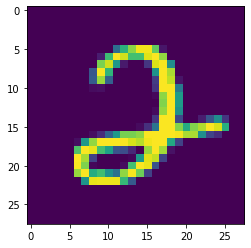

In [ ]:
img = X[1].reshape(28,28)
imgplot = plt.imshow(img)

## Problem-4

Center the the dataset $\mathbf{X}$ around its mean. Call this centered dataset $\mathbf{X}^{\prime}$.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{n \cdot d} \sqrt{\sum \limits_{i = 1}^{n} \sum \limits_{j = 1}^{d} (X_{ij}^{\prime})^2}
$$

In [ ]:
X_mean = X.mean(axis=0)
print(X_mean.shape)
print(X.shape)
X_c = X - X_mean
n = X_c.shape[0]
d = X_c.shape[1]
s = 0
for i in range(n):
  for j in range(d):
    s = s + (X_c[i,j])**2
print(s)
ans = (1/(n*d)) * (s**0.5)
print(ans)

(784,)
(100, 784)
332036355.8400077
0.23242174456564954


In [ ]:
a = np.array([1,2,3])
a.T

array([1, 2, 3])

In [ ]:
s = np.sum(X_c**2)
(s**0.5)/(n*d)

0.23242174456564685

In [ ]:
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(a)
a_mean = a.mean(axis=0)
print(a_mean)
a_mean.shape

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[4. 5. 6.]


(3,)

## Problem-5

Compute the covariance matrix $\mathbf{C}$ of the centered dataset.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{d^2} \sqrt{\sum \limits_{i = 1}^{d} \sum \limits_{j = 1}^{d} C_{ij}^2}
$$

In [ ]:
Cov_X = (X_c.T @ X_c)/n
ans = np.sum(Cov_X**2)**0.5
ans/(d**2)

1.3648061009232249

## Problem-6

Compute the first and second principal components of the dataset, $\mathbf{w}_1$ and $\mathbf{w}_2$.

<u>Conversion</u>

Compute:
$$
\mathbf{w} = \mathbf{w}_1 + \mathbf{w}_2
$$

Enter the following quantity as your answer correct to two decimal places:

$$
\left| \sum \limits_{i = 1}^{d} w_i \right|
$$

In [ ]:
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
x,y = np.linalg.eigh(a)
print(x)
print(y)
print(y[:,-2:])

[-3.15746784 -0.67276795 18.8302358 ]
[[-0.80238891  0.43402538 -0.40962667]
 [-0.16812656 -0.82296167 -0.54264865]
 [ 0.57263033  0.36654613 -0.73330651]]
[[ 0.43402538 -0.40962667]
 [-0.82296167 -0.54264865]
 [ 0.36654613 -0.73330651]]


In [ ]:
k,w_all = np.linalg.eigh(Cov_X)
w1 = w_all[:,-1]
w2 = w_all[:,-2]
w = w1 + w2
abs(w.sum())

1.051624388059819

## Problem-7

Visualize the first principal component as an image.

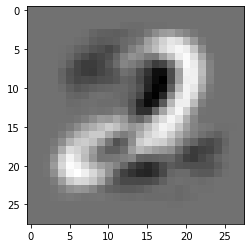

In [ ]:
pc1_img = w1.reshape(28,28)
plt.imshow(pc1_img, cmap = 'gray')

## Problem-8

Find the smallest value of $k$ for which the first $k$ principal components capture at least $95\%$ of the variance in the data.

In [ ]:
(k_all,_) = np.linalg.eigh(Cov_X)
k_all = list(reversed(k_all))
k_all_sum = np.sum(k_all)
v = 0
sum_k = 0
v_thr = 0.95
i = 1
for k in k_all:
  sum_k = sum_k + k
  if sum_k/k_all_sum >= v_thr:
    k_s = k
    break
  i = i + 1
print(i)

53


## Problem-9

Given a `test_image`, visualize the proxies  by reconstructing it using the top $k$ principal components. Consider four values of $k$; values of $k$ for which the top-$k$ principal components explain:

- 20% of the variance
- 50% of the variance
- 80% of the variance
- 95% of the variance



In [ ]:
def recon_img(test_image, Cov_X, v_thr):
  k_all, w_all = np.linalg.eigh(Cov_X)
  k_all = list(reversed(k_all))
  k_all_sum = np.sum(k_all)
  sum_k = 0
  i = 1
  for k in k_all:
    sum_k = sum_k + k
    if sum_k/k_all_sum >= v_thr:
      print(i)
      w_s = w_all[:,-i:]
      coeff = test_image @ w_s
      #coeff = np.expand_dims(coeff,1)
      return w_s @ coeff
    i = i + 1

In [ ]:
'''
k_all, w_all = np.linalg.eigh(Cov_X)
w_s = w_all[:,-3:]
coeff = test_image @ w_s
coeff = np.expand_dims(coeff,1)
print("Coeff shape:",coeff.shape)
recon_img = w_s @ coeff
'''

'\nk_all, w_all = np.linalg.eigh(Cov_X)\nw_s = w_all[:,-3:]\ncoeff = test_image @ w_s\ncoeff = np.expand_dims(coeff,1)\nprint("Coeff shape:",coeff.shape)\nrecon_img = w_s @ coeff\n'

In [ ]:
'''
a = np.array([1,2,3])
print(a.shape)
b = np.array([[2,4,5]])
print(b.shape)
b @ a
'''

'\na = np.array([1,2,3])\nprint(a.shape)\nb = np.array([[2,4,5]])\nprint(b.shape)\nb @ a\n'

In [ ]:
X_test = test_image
img_k20 = recon_img(test_image,Cov_X, 0.2)
img_k50 = recon_img(test_image,Cov_X, 0.5)
img_k80 = recon_img(test_image,Cov_X, 0.8)
img_k95 = recon_img(test_image,Cov_X, 0.95)

plt.subplot(2,2, 1)
plt.imshow(img_k20.reshape(28,28), cmap = 'gray')

plt.subplot(2,2, 2)
plt.imshow(img_k50.reshape(28,28), cmap = 'gray')

plt.subplot(2,2, 3)
plt.imshow(img_k80.reshape(28,28), cmap = 'gray')

plt.subplot(2,2, 4)
plt.imshow(img_k95.reshape(28,28), cmap = 'gray')


2
6
22
53


2
6
22
53


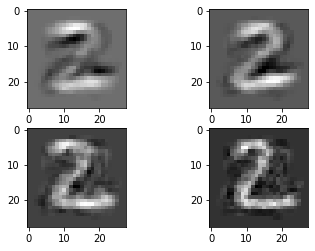

In [ ]:
# Reconstruct image using PCA
eig_vals, eig_vecs = np.linalg.eigh(Cov_X)
eig_vals = list(reversed(eig_vals))
def find_k(eig_vals, v_thr):
  sum_var = 0
  for (i,eig_val) in enumerate(eig_vals):
    sum_var = sum_var + eig_val
    if sum_var/np.sum(eig_vals) >= v_thr:
      return i+1

def recon_image(image, Cov_X, var):
  eig_vals, eig_vecs = np.linalg.eigh(Cov_X)
  eig_vals = list(reversed(eig_vals))
  k = find_k(eig_vals,var)
  print(k)
  w_k = eig_vecs[:,-k:]
  cof = image @ w_k
  return w_k @ cof

vars_thr = [0.20, 0.50, 0.80, 0.95]
for (i,var_thr) in enumerate(vars_thr):
  reconstructed_image = recon_image(test_image, Cov_X, var_thr).reshape(28,28)
  plt.subplot(2,2,i+1)
  plt.imshow(reconstructed_image, cmap = "gray")


53


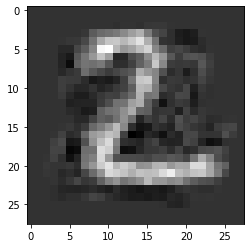

In [ ]:
im1 = recon_image(test_image, Cov_X, 0.95)
plt.imshow(im1.reshape(28,28), cmap = 'gray')

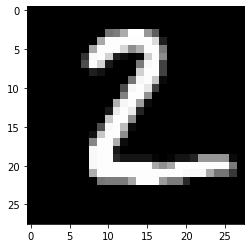

In [ ]:
plt.imshow(test_image.reshape(28,28), cmap = 'gray')